In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/df_preprocessed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192662 entries, 0 to 192661
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          192662 non-null  object 
 1   state            192662 non-null  int64  
 2   delta_dead_laun  192662 non-null  float64
 3   category         192662 non-null  object 
 4   launch_day       192662 non-null  int64  
 5   launch_hour      192662 non-null  int64  
 6   name_len         192662 non-null  int64  
 7   blurb_len        192662 non-null  int64  
 8   goal_usd         192662 non-null  float64
dtypes: float64(2), int64(5), object(2)
memory usage: 13.2+ MB


In [5]:
df.describe()

,goal_usd,name_len,delta_dead_laun
count,2.092220e+05,209222.000000,209222.000000
mean,4.029193e+04,35.471002,785.232265
std,1.093502e+06,15.716247,284.294086
min,1.000000e-02,1.000000,24.000000
25%,1.500000e+03,22.000000,719.000000
50%,5.000000e+03,35.000000,720.000000
75%,1.300000e+04,50.000000,833.000000
max,1.325680e+08,96.000000,2234.000000


In [3]:
#goal = df.query('goal_usd > 100 and goal_usd < 1000000')
#goal = df.query('state == "successful" or state == "failed"')
#goal.describe()
#goal.info()
#goal['state'].unique()

In [ ]:
# add a column to bin goal_usd
# 100-1000
# 1000-5000
# 5000-10000
# 10000-50000
# 50000-100000
# >100000


In [5]:
# create a list of our conditions
conditions = [
    (df['goal_usd'] <= 1000),
    (df['goal_usd'] > 1000) & (df['goal_usd'] <= 5000),
    (df['goal_usd'] > 5000) & (df['goal_usd'] <= 10000),
    (df['goal_usd'] > 10000) & (df['goal_usd'] <= 50000),
    (df['goal_usd'] > 50000) & (df['goal_usd'] <= 100000),
    (df['goal_usd'] > 100000)
    ]

# create a list of the values we want to assign for each condition
values = ['< 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '> 100,000']

# create a new column and use np.select to assign values to it using our lists as arguments
df['goal_bin'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,country,state,delta_dead_laun,category,launch_day,launch_hour,name_len,blurb_len,goal_usd,goal_bin
0,US,1,720.0,games,3,19,23,125,1000.0000,"< 1,000"
1,US,1,720.0,music,0,7,51,108,15000.0000,"10,000 - 50,000"
2,GB,0,1439.0,games,3,19,34,133,13083.9361,"10,000 - 50,000"
3,US,1,720.0,publishing,0,21,40,121,2800.0000,"1,000 - 5,000"
4,US,1,720.0,music,3,4,31,134,3500.0000,"1,000 - 5,000"


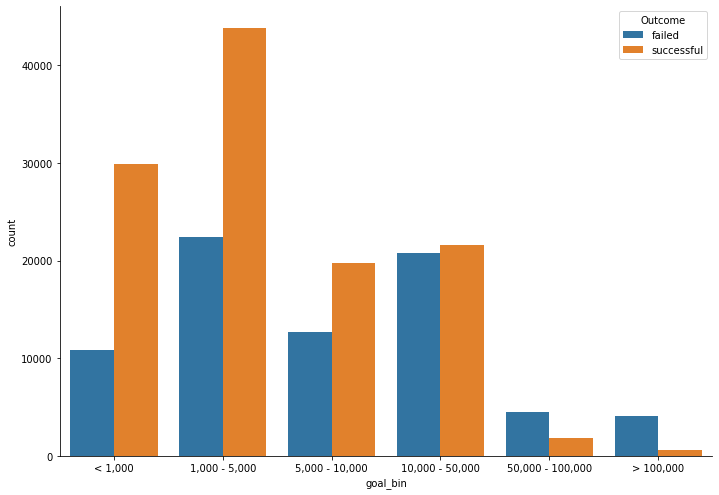

In [21]:
fig, ax = plt.subplots()
sns.countplot(x='goal_bin', hue='state', data=df, order=['< 1,000', '1,000 - 5,000', '5,000 - 10,000', '10,000 - 50,000', '50,000 - 100,000', '> 100,000'])
plt.legend(title='Outcome', loc='upper right', labels=['failed', 'successful'])
fig.set_size_inches(11.7, 8.27)
sns.despine()

In [13]:
#sns.histplot(x='goal_usd', hue='state', data=goal, bins=[100,1000,5000,10000,50000,100000], multiple='dodge')
#plt.ylim(0,2000)

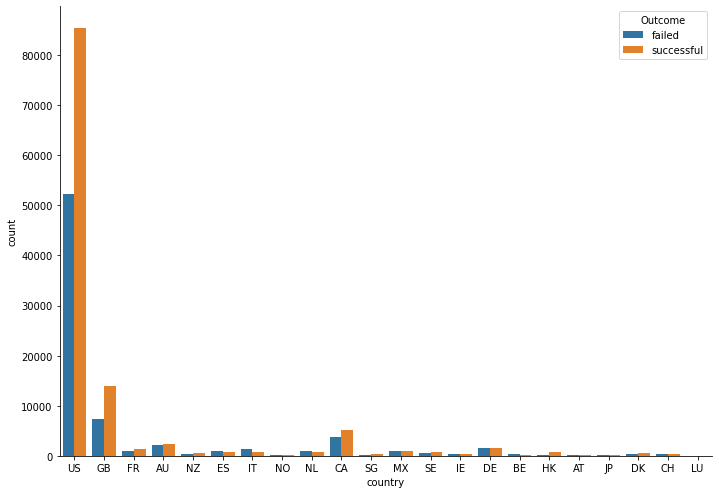

In [22]:
fig, ax = plt.subplots()
sns.countplot(x='country', data=df, hue='state')
plt.legend(title='Outcome', loc='upper right', labels=['failed', 'successful'])
fig.set_size_inches(11.7, 8.27)
sns.despine()

In [40]:
# unfortunately, craft and crafts are listed as two separate categories
# combine them into crafts
df.loc[(df['category'] == 'craft'), 'category'] = 'crafts'

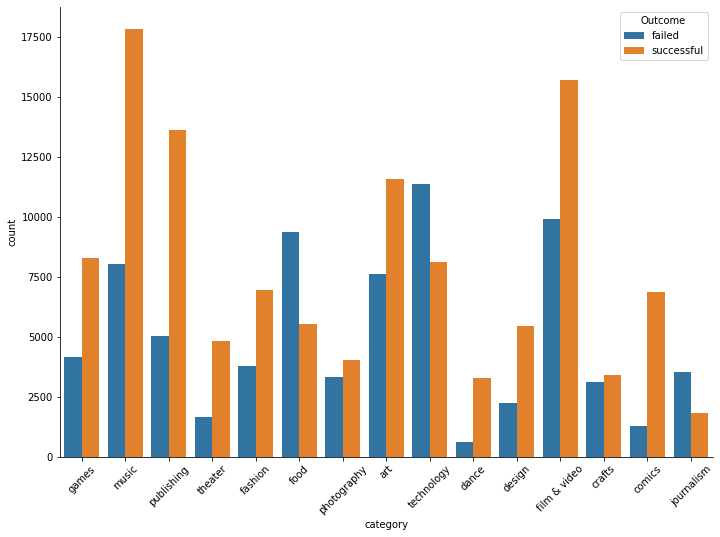

In [41]:
fig, ax = plt.subplots()
sns.countplot(x='category', data=df, hue='state')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Outcome', loc='upper right', labels=['failed', 'successful'])
fig.set_size_inches(11.7, 8.27)
sns.despine()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192662 entries, 0 to 192661
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   country          192662 non-null  object 
 1   state            192662 non-null  int64  
 2   delta_dead_laun  192662 non-null  float64
 3   category         192662 non-null  object 
 4   launch_day       192662 non-null  int64  
 5   launch_hour      192662 non-null  int64  
 6   name_len         192662 non-null  int64  
 7   blurb_len        192662 non-null  int64  
 8   goal_usd         192662 non-null  float64
 9   goal_bin         192662 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 14.7+ MB


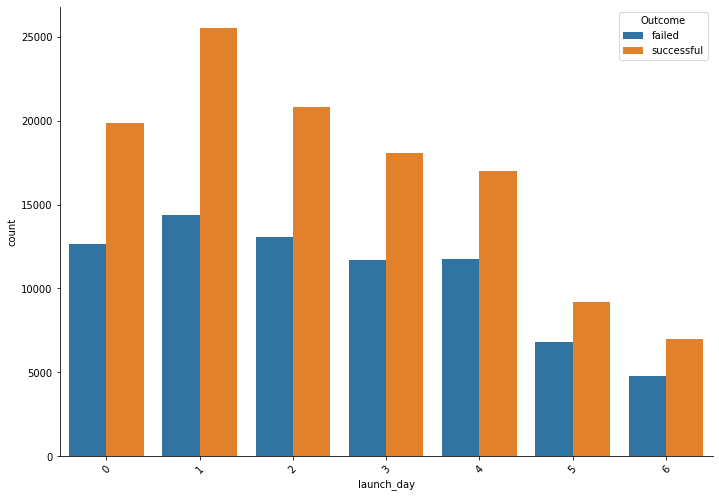

In [29]:
fig, ax = plt.subplots()
sns.countplot(x='launch_day', data=df, hue='state')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Outcome', loc='upper right', labels=['failed', 'successful'])
fig.set_size_inches(11.7, 8.27)
sns.despine()

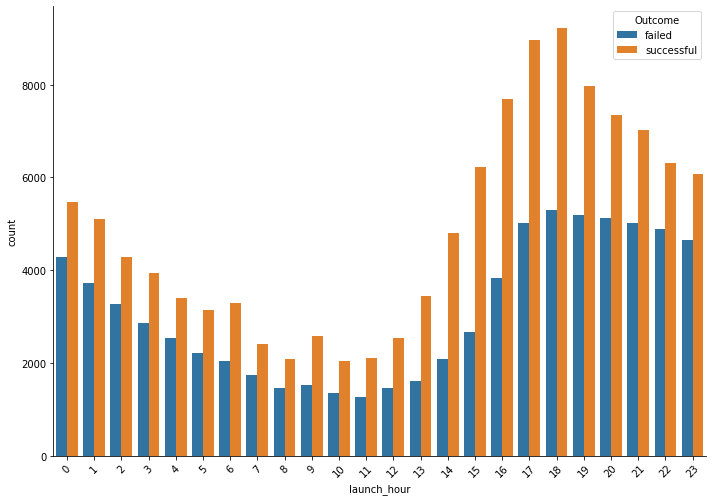

In [30]:
fig, ax = plt.subplots()
sns.countplot(x='launch_hour', data=df, hue='state')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Outcome', loc='upper right', labels=['failed', 'successful'])
fig.set_size_inches(11.7, 8.27)
sns.despine()

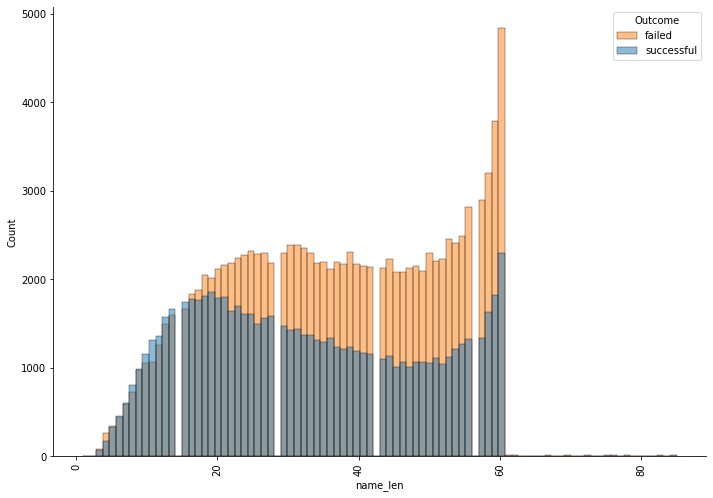

In [39]:
fig, ax = plt.subplots()
sns.histplot(x='name_len', data=df, hue='state')
ax.tick_params(axis='x', rotation=90)
plt.legend(title='Outcome', loc='upper right', labels=['failed', 'successful'])
fig.set_size_inches(11.7, 8.27)
sns.despine()

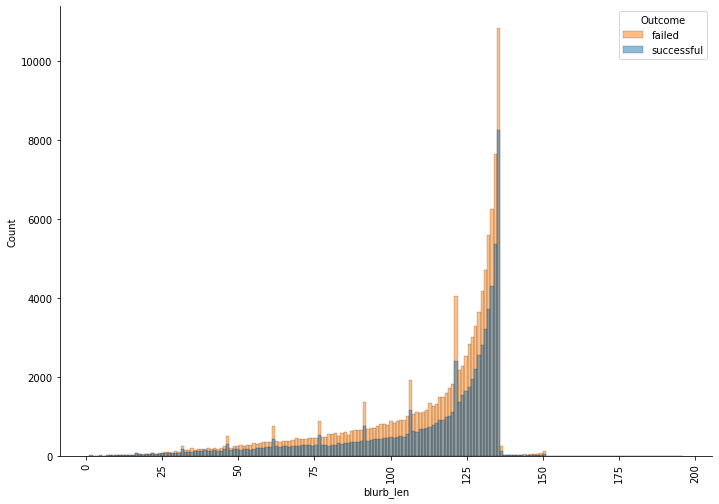

In [37]:
fig, ax = plt.subplots()
sns.histplot(x='blurb_len', data=df, hue='state')
ax.tick_params(axis='x', rotation=90)
plt.legend(title='Outcome', loc='upper right', labels=['failed', 'successful'])
fig.set_size_inches(11.7, 8.27)
sns.despine()

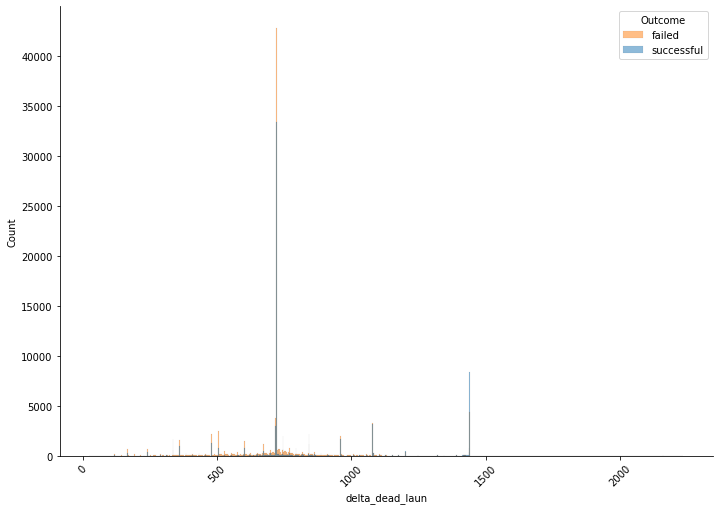

In [38]:
fig, ax = plt.subplots()
sns.histplot(x='delta_dead_laun', data=df, hue='state')
ax.tick_params(axis='x', rotation=45)
plt.legend(title='Outcome', loc='upper right', labels=['failed', 'successful'])
fig.set_size_inches(11.7, 8.27)
sns.despine()